In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
val_df = pd.read_csv(
    "../../data/02/features_3sec-1sec/3-1_val_df.csv", index_col=0)

y_val = val_df['genre']
x_val = val_df.drop(columns=['genre', 'filename'])

def model_assess(model, title="Default"):
    model.fit(X, y)
    preds = model.predict(x_val)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_val, preds), 5))
    print('F1 score', title, ':', f1_score(y_val, preds, average="weighted"), '\n')


In [ ]:
X_new = SelectKBest(k=20).fit_transform(X, y)
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2342.514392,53209.958784,1776.105663,83841.640025,18.634917,0.001741,0.000227,0.049730,0.000127,4492.240272,1.069862e+06,0.415077,0.412073,0.236024,0.285572,0.265328,0.302825,0.321798,0.436525,3737.0
1,2315.441183,48980.207137,1740.256540,75255.081065,18.970138,0.002312,0.000251,0.056469,0.000112,4327.842548,1.027498e+06,0.385383,0.376718,0.196690,0.235425,0.192125,0.289566,0.224254,0.340233,3637.0
2,2320.267862,44284.018656,1744.214758,77362.870552,18.387327,0.002391,0.000236,0.057054,0.000132,4338.691970,9.555127e+05,0.295420,0.208644,0.151155,0.219656,0.167791,0.384211,0.178560,0.301973,3866.0
3,2317.550069,36720.206933,1756.872895,57204.167192,18.982403,0.002307,0.000257,0.056287,0.000147,4329.664588,8.238035e+05,0.314965,0.271972,0.180057,0.204954,0.172867,0.321560,0.199151,0.289265,3782.0
4,2339.747084,40322.106383,1789.524889,99687.082819,19.070494,0.002050,0.000222,0.052664,0.000187,4428.054763,9.480057e+05,0.338677,0.235620,0.195815,0.271043,0.276866,0.398055,0.264373,0.339393,3734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,2574.850279,52150.299172,2672.893801,313542.907445,22.728149,0.006812,0.001019,0.098798,0.000373,5804.440542,5.257184e+05,0.195866,0.298925,0.519762,0.183883,0.260370,0.198236,0.267948,0.242152,8588.0
12407,2590.875596,59421.158311,2706.288121,348301.516946,22.310103,0.007151,0.001207,0.101903,0.000464,5852.227689,6.319355e+05,0.157653,0.251239,0.480008,0.182082,0.209564,0.185395,0.238072,0.189266,8829.0
12408,2562.543733,68248.895785,2587.143803,340258.002571,23.130212,0.007562,0.001131,0.103710,0.000413,5723.442571,6.682391e+05,0.170341,0.253215,0.463408,0.246430,0.208292,0.198042,0.222786,0.192997,8107.0
12409,2555.185684,69948.453775,2628.271982,377905.794554,23.528471,0.007325,0.001211,0.101069,0.000473,5742.242713,6.902565e+05,0.175628,0.166362,0.403014,0.250387,0.178558,0.251382,0.237310,0.255835,8938.0


In [ ]:
mean_cols = [col for col in df_out.columns if 'mean' in col]
f_means = X[mean_cols]
var_cols = [col for col in df_out.columns if 'var' in col]
f_vars = X[var_cols]

0.0


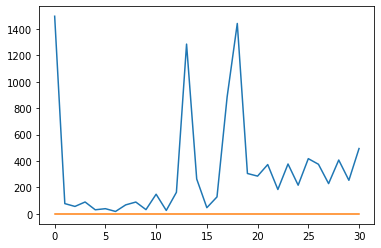

In [ ]:
from sklearn.feature_selection import f_classif

f, p = f_classif(f_means, y)
plt.plot(f)
plt.plot(p)
print(round(p.mean(),5))

0.0


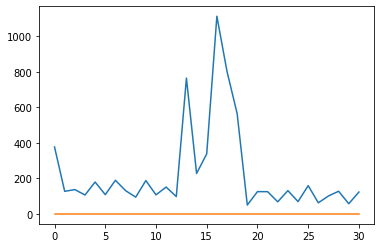

In [ ]:
f, p = f_classif(f_vars, y)
plt.plot(f)
plt.plot(p)
print(round(p.mean(),5))

In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=38)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=10, 
    random_state=0
)
model_assess(rforest, "Random Forest")

# Support Vector Machine ovr
svm = SVC(decision_function_shape="ovr")
model_assess(svm, "Support Vector Machine ovr")

# Support Vector Machine ovo
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine ovo")

# Logistic Regression
lg = LogisticRegression(
    random_state=0, 
    solver='lbfgs',
    multi_class='multinomial', 
    max_iter=10000
)
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(
    solver='adam', 
    alpha=1e-5,
    hidden_layer_sizes=(1000, 10), 
    random_state=1
)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(
    n_estimators=10000, 
    learning_rate=0.05, 
    eval_metric="mlogloss",
    objective='multi:softmax'
)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax', eval_metric="mlogloss",)
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")


Accuracy Naive Bayes : 0.35508
F1 score Naive Bayes : 0.2942458779894707 

Accuracy Stochastic Gradient Descent : 0.21767
F1 score Stochastic Gradient Descent : 0.14947579349473114 

Accuracy KNN : 0.27697
F1 score KNN : 0.2719647471089257 

Accuracy Decission trees : 0.47749
F1 score Decission trees : 0.47083271763159806 

Accuracy Random Forest : 0.61705
F1 score Random Forest : 0.6126598566348528 

Accuracy Support Vector Machine ovr : 0.27364
F1 score Support Vector Machine ovr : 0.23612685074365544 

Accuracy Support Vector Machine ovo : 0.27364
F1 score Support Vector Machine ovo : 0.23612685074365544 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy Logistic Regression : 0.38604
F1 score Logistic Regression : 0.34645781010619786 

Accuracy Neural Nets : 0.10002
F1 score Neural Nets : 0.018190085465044126 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy Cross Gradient Booster : 0.66849
F1 score Cross Gradient Booster : 0.6669662932535649 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy Cross Gradient Booster (Random Forest) : 0.54442
F1 score Cross Gradient Booster (Random Forest) : 0.5444684889880802 



In [ ]:
# same with normalized data

def model_assess_scaled(model, X, x_val, y_val, title="Default"):
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    x_val = min_max_scaler.fit_transform(x_val)
    model.fit(X, y)
    preds = model.predict(x_val)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_val, preds), 5))
    print('F1 score', title, ':', round(f1_score(y_val, preds, average="weighted"), 5), '\n')
    #print('Confusion matrix\n', title, ':\n', confusion_matrix(y_val, preds), '\n')


In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess_scaled(nb, X, x_val, y_val, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess_scaled(sgd, X, x_val, y_val, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=38)
model_assess_scaled(knn, X, x_val, y_val, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess_scaled(tree, X, x_val, y_val, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(
    n_estimators=1000, max_depth=10, random_state=0)
model_assess_scaled(rforest, X, x_val, y_val, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovr")
model_assess_scaled(svm, X, x_val, y_val, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial', max_iter=10000)
model_assess_scaled(lg, X, x_val, y_val, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='adam', alpha=1e-5,
                   hidden_layer_sizes=(5000, 10), random_state=1)
model_assess_scaled(nn, X, x_val, y_val, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=10000, learning_rate=0.05,
                    objective='multi:softmax')
model_assess_scaled(xgb, X, x_val, y_val, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax')
model_assess_scaled(xgbrf, X, x_val, y_val,
                    "Cross Gradient Booster (Random Forest)")


Accuracy Naive Bayes : 0.40319
F1 score Naive Bayes : 0.36899 

Accuracy Stochastic Gradient Descent : 0.47035
F1 score Stochastic Gradient Descent : 0.47353 

Accuracy KNN : 0.43487
F1 score KNN : 0.43248 

Accuracy Decission trees : 0.28054
F1 score Decission trees : 0.27149 

Accuracy Random Forest : 0.52917
F1 score Random Forest : 0.52581 

Accuracy Support Vector Machine : 0.52227
F1 score Support Vector Machine : 0.52474 

Accuracy Logistic Regression : 0.47892
F1 score Logistic Regression : 0.4808 

Accuracy Neural Nets : 0.5287
F1 score Neural Nets : 0.53148 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:40:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster : 0.46702
F1 score Cross Gradient Booster : 0.4571 



/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster (Random Forest) : 0.3639
F1 score Cross Gradient Booster (Random Forest) : 0.33932 



In [ ]:
X.shape, len(y)

((12411, 64), 12411)

### KNN elbow method

In [ ]:
error_rate = []
start = 1
end = 50
for i in range(start, end):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    pred_i = knn.predict(x_val)
    error_rate.append(np.mean(pred_i != y_val))


Best K : 27 with 0.71446 error rate


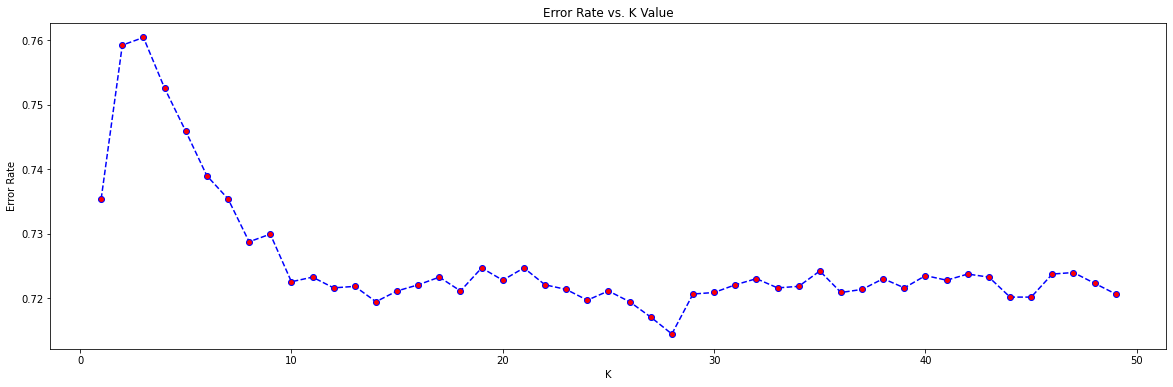

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(
    range(start, end), 
    error_rate, 
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='red', 
    markersize=6
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

min_error_rate = min(error_rate)
best_k = error_rate.index(min_error_rate)
print(f"Best K : {best_k} with {round(min_error_rate, 5)} error rate")


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
model_assess_scaled(knn, X, x_val, y_val, "KNN")


Accuracy KNN : 0.43749
F1 score KNN : 0.43562 



In [ ]:
import pycaret.classification as cl
import xgboost

clf1 = cl.setup(data=df_out, target='genre')



,Description,Value
0,session_id,3376
1,Target,genre
2,Target Type,Multiclass
3,Label Encoded,"blues: 0, classical: 1, country: 2, disco: 3, hiphop: 4, jazz: 5, metal: 6, pop: 7, reggae: 8, rock: 9"
4,Original Data,"(12411, 66)"
5,Missing Values,False
6,Numeric Features,64
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
xgb = cl.create_model('xgboost')
tuned_xgboost = cl.tune_model(xgboost)
best = cl.compare_models()


IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/gio/anaconda3/envs/sound/lib/python3.8/site-packages/x

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
pred = cl.predict_model(tuned_xgboost, data=x_val, target=y_val)

NameError: name 'tuned_xgboost' is not defined